In [1]:
from exps.ttm.TTLinear import TTLinear

In [2]:
import torch
weights = torch.rand(768, 3072)

## Create layer

In [3]:
a = TTLinear(in_features = 3072, out_features = 768, ranks =[72, 72, 72] , input_dims = [32, 2, 3, 16], output_dims= [12, 2, 2 ,16])

in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


TypeError: object of type 'NoneType' has no len()

## Get colbert weights

In [4]:
import sys
sys.path.append("/notebook/ColBERT")

from colbert.modeling.colbert import ColBERT

from colbert.utils.tensor_net import TTLayer

query_maxlen = 512
query_maxlen = 512
doc_maxlen = 512
dim = 128
similarity = 'cosine'

colbert = ColBERT.from_pretrained('bert-base-uncased', query_maxlen=query_maxlen, doc_maxlen=doc_maxlen, dim=dim, similarity_metric=similarity, mask_punctuation=False)
print(sum(p.numel() for p in colbert.parameters()))

2023-02-20 22:20:31.540510: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Some weights of the model checkpoint at bert-base-uncased were not used when initializing ColBERT: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing ColBERT from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ColBERT from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of

109580544


## 1st layer

In [5]:
fc_w = colbert.bert.encoder.layer[0].output.dense

In [6]:
a.set_weight(fc_w.weight)

AssertionError: Expected shape torch.Size([3072, 768]), got torch.Size([768, 3072])

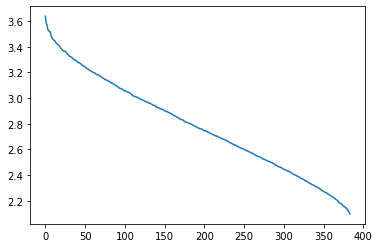

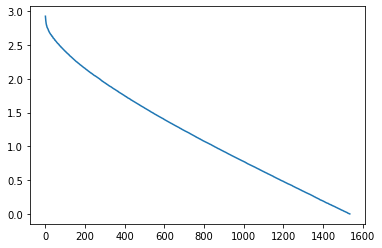

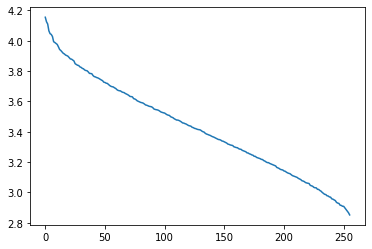

In [8]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem)
    plt.show()

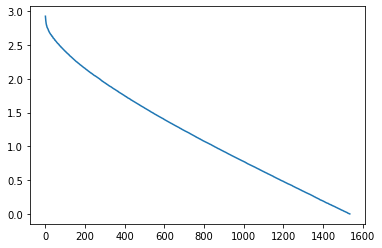

In [9]:
plt.plot(a.weight.s_values[1])
plt.show()

## second layer

In [10]:
fc_w = colbert.bert.encoder.layer[1].output.dense

In [11]:
a.set_weight(fc_w.weight)

shape of data torch.Size([384, 4, 6, 256])
shape of matrix torch.Size([384, 6144])
shape of data 0 torch.Size([384, 4, 6, 256])
for reshaping (1536, 6, 256)
shape of data ] torch.Size([1536, 6, 256])
singular values over axis  1
tensor([4.0281, 3.9754, 3.9073, 3.8395, 3.8373, 3.7941, 3.7644, 3.7423, 3.7281,
        3.7166, 3.7002, 3.6940, 3.6803, 3.6750, 3.6545, 3.6470, 3.6346, 3.6291,
        3.6137, 3.6113, 3.5946, 3.5895, 3.5874, 3.5779, 3.5716, 3.5667, 3.5586,
        3.5569, 3.5527, 3.5455, 3.5432, 3.5344, 3.5284, 3.5205, 3.5165, 3.5090,
        3.4993, 3.4989, 3.4941, 3.4903, 3.4870, 3.4829, 3.4730, 3.4661, 3.4654,
        3.4606, 3.4544, 3.4475, 3.4430, 3.4397, 3.4359, 3.4230, 3.4215, 3.4175,
        3.4161, 3.4124, 3.4061, 3.4008, 3.3955, 3.3910, 3.3884, 3.3842, 3.3780,
        3.3732, 3.3690, 3.3664, 3.3628, 3.3558, 3.3525, 3.3497, 3.3415, 3.3398,
        3.3353, 3.3312, 3.3298, 3.3228, 3.3189, 3.3166, 3.3132, 3.3080, 3.3050,
        3.3043, 3.3013, 3.2960, 3.2918, 3.2836, 3.2

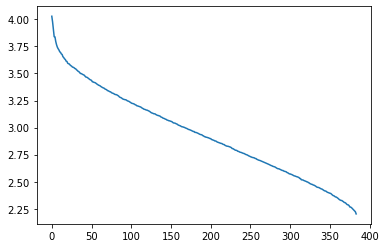

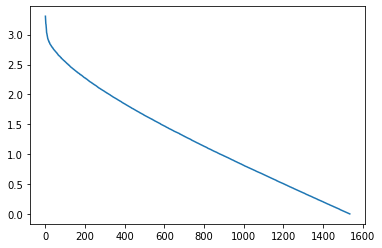

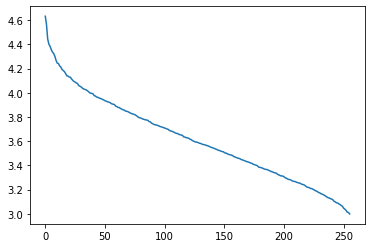

In [12]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem)
    plt.show()

# encoder

In [6]:
a = TTLinear(in_features = 768, out_features = 3072, ranks =[72, 72, 72] , input_dims = [12, 2, 2 ,16], output_dims= [32, 2, 3, 16])

in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


In [17]:
fc_w = colbert.bert.encoder.layer[1].intermediate.dense

In [ ]:
a.set_weight(fc_w.weight)

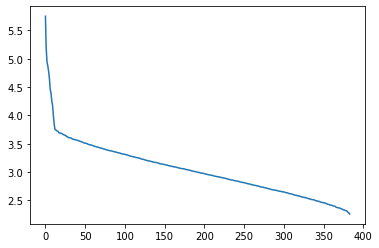

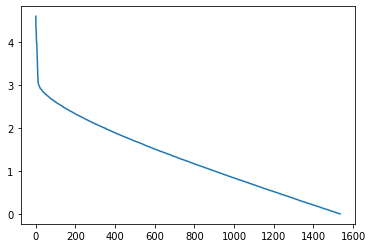

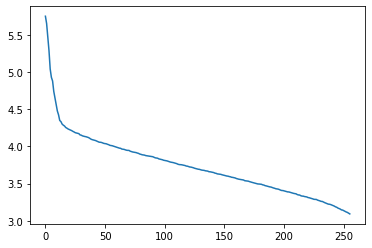

In [19]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem)
    plt.show()

In [3]:
a = TTLinear(in_features = 768, out_features = 3072, ranks =[72, 72, 72] , input_dims = [6, 4, 4 ,8], output_dims= [16, 4, 6, 8])

in ful rank tt data.shape torch.Size([96, 16, 24, 64])
self.cores shape [torch.Size([1, 96, 96]), torch.Size([96, 16, 1536]), torch.Size([1536, 24, 64]), torch.Size([64, 64, 1])]
in round tt cores
torch.Size([1, 96, 96])
torch.Size([96, 16, 1536])
torch.Size([1536, 24, 64])
torch.Size([64, 64, 1])


In [6]:
fc_w = colbert.bert.encoder.layer[0].intermediate.dense

In [ ]:
a.set_weight(fc_w.weight)

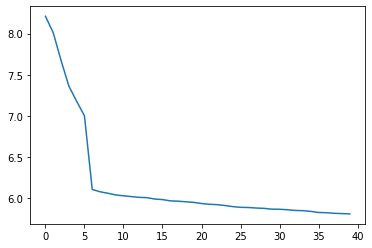

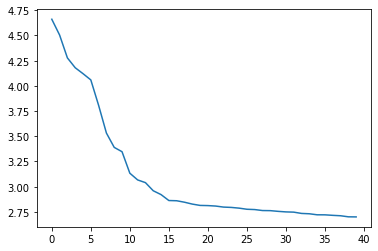

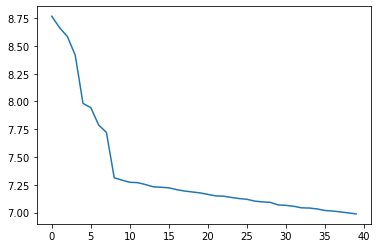

In [25]:
import matplotlib.pyplot as plt
for elem in a.weight.s_values:
    plt.plot(elem[:40])
    plt.show()

layer  0
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


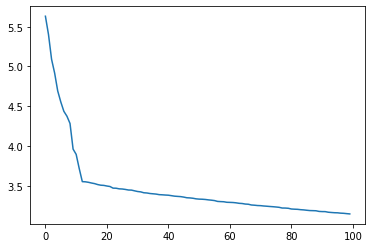

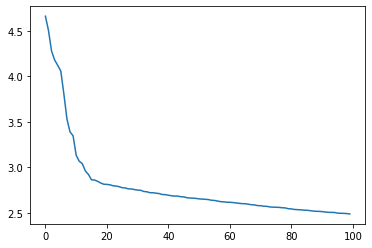

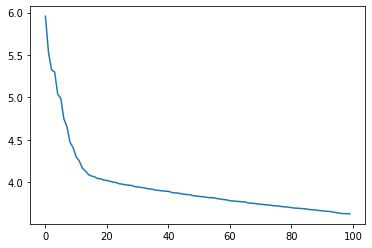



layer  1
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


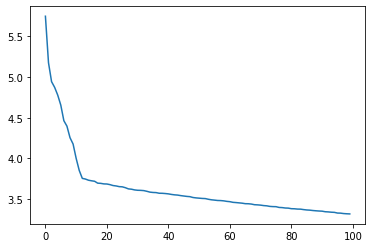

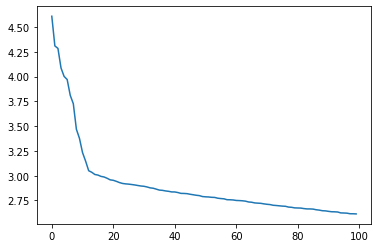

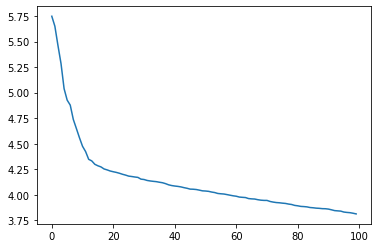



layer  2
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


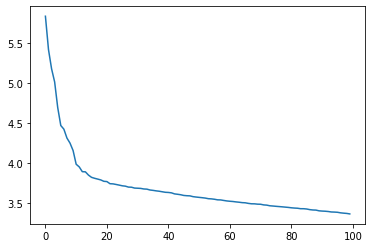

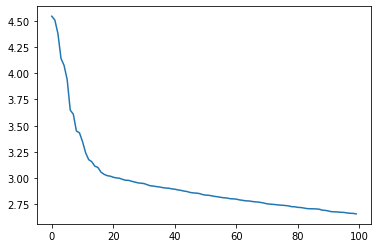

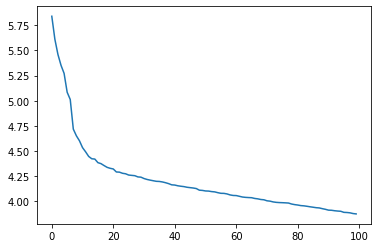



layer  3
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


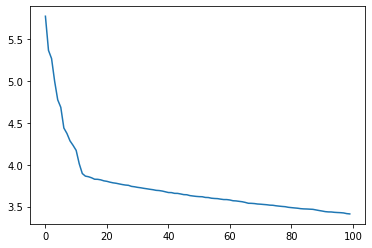

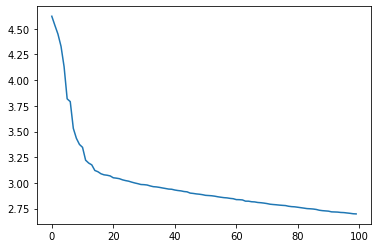

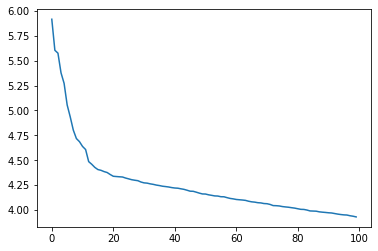



layer  4
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


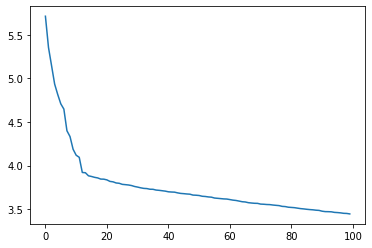

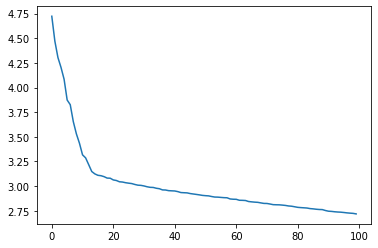

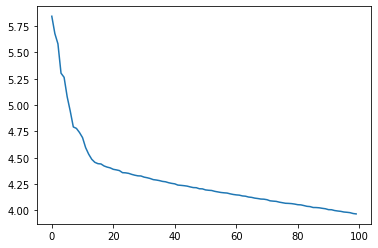



layer  5
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


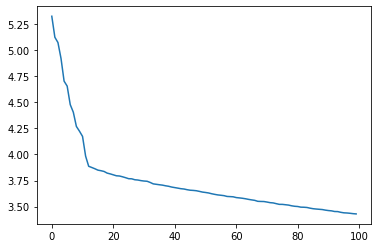

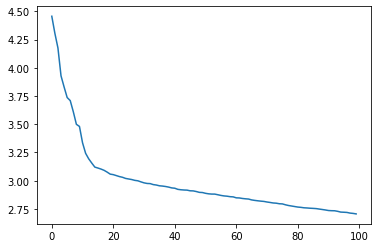

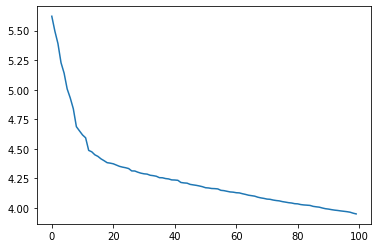



layer  6
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


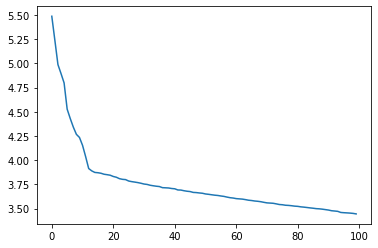

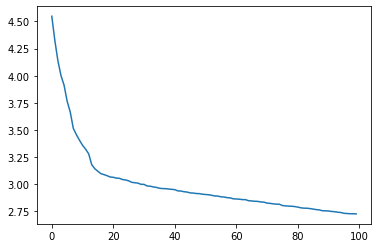

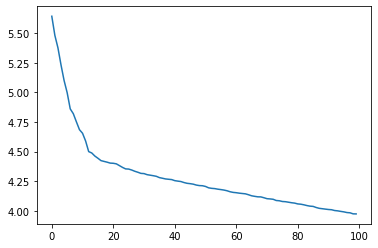



layer  7
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


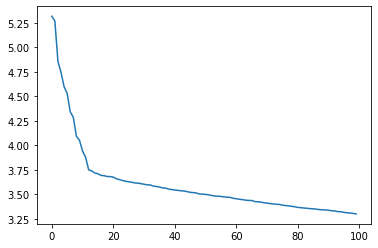

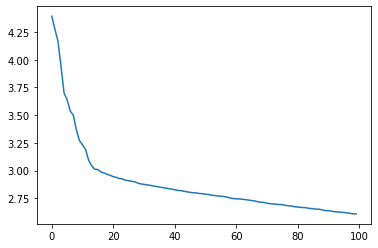

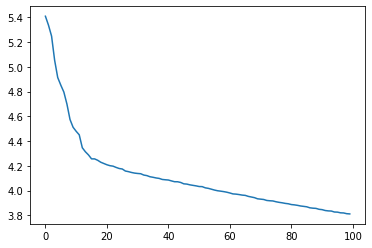



layer  8
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


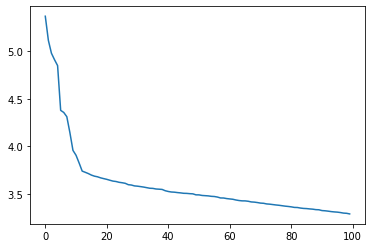

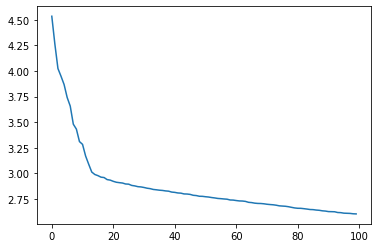

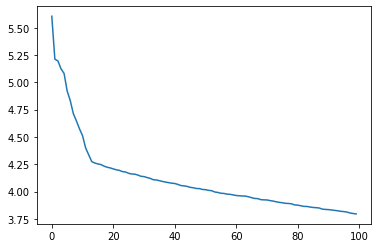



layer  9
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


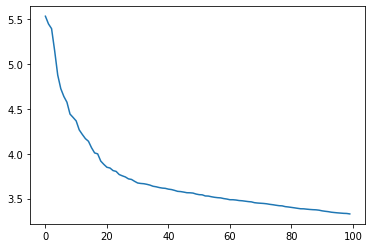

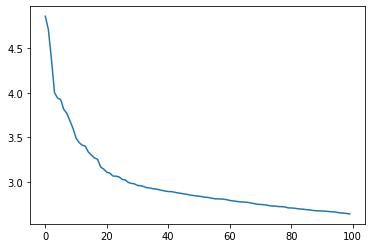

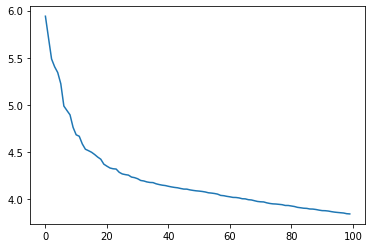



layer  10
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


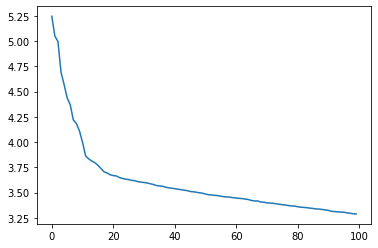

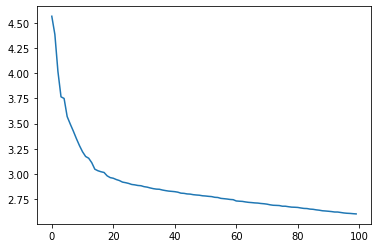

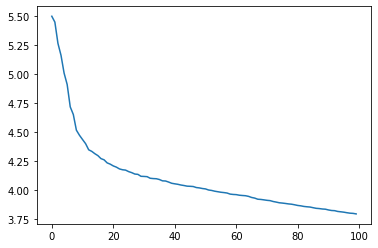



layer  11
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


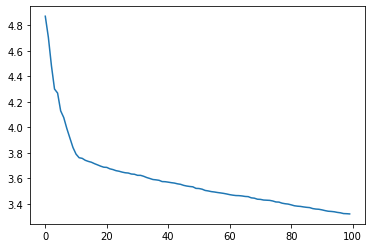

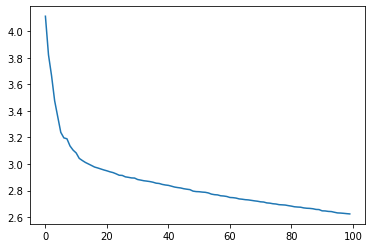

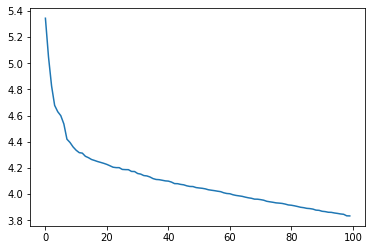

In [7]:
import matplotlib.pyplot as plt
for ind, elem in enumerate(colbert.bert.encoder.layer):
    print ("layer ", ind)
    fc_w = colbert.bert.encoder.layer[ind].intermediate.dense
    a.set_weight(fc_w.weight)
    for elem in a.weight.s_values:
        plt.plot(elem[:100])
        plt.show()
    print ("\n")

## decoder

In [8]:
a = TTLinear(in_features = 3072, out_features = 768, ranks =[72, 72, 72] , input_dims = [32, 2, 3, 16], output_dims= [12, 2, 2 ,16])

in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


layer  0
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


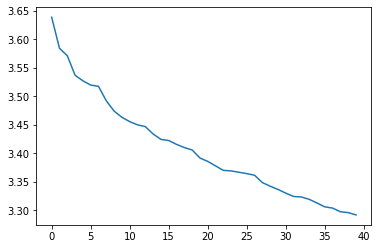

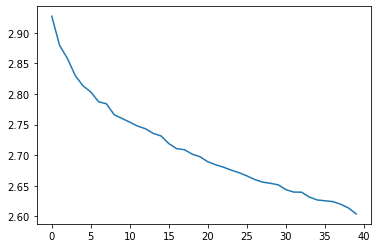

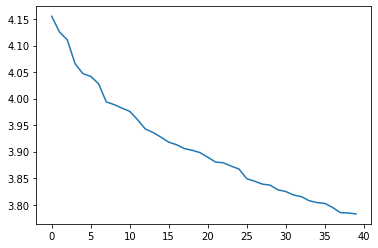



layer  1
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


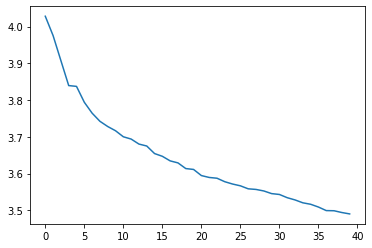

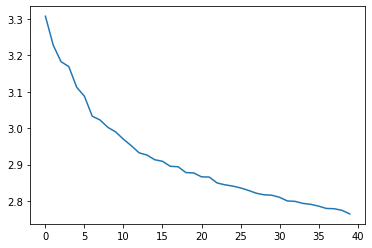

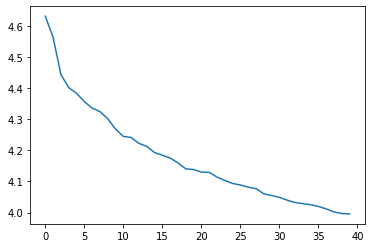



layer  2
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


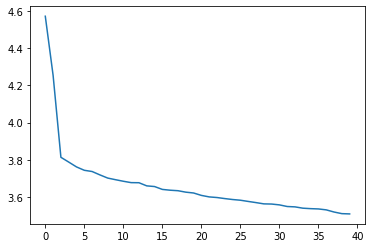

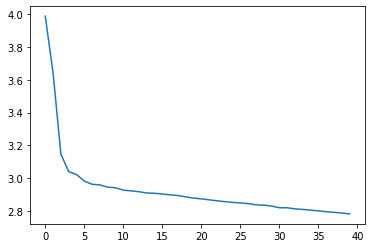

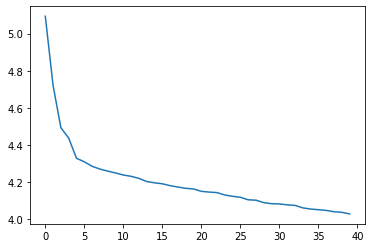



layer  3
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


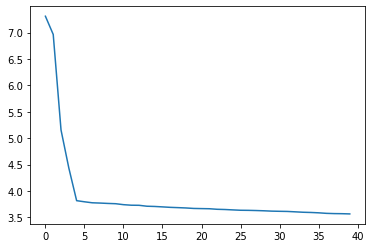

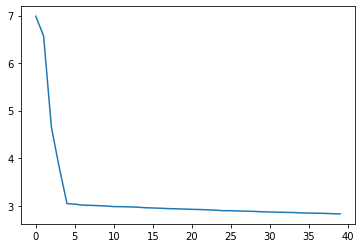

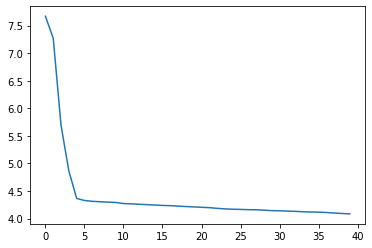



layer  4
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


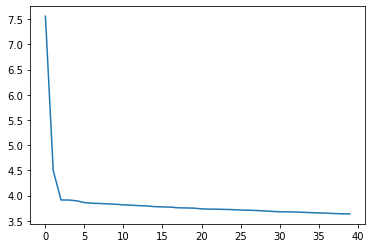

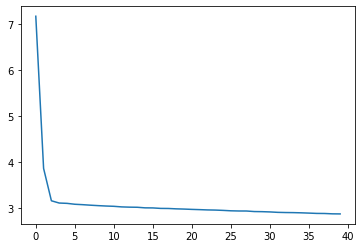

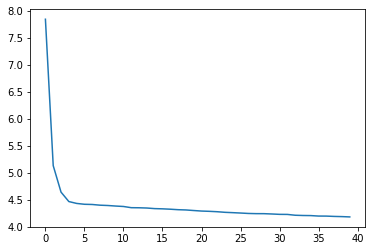



layer  5
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


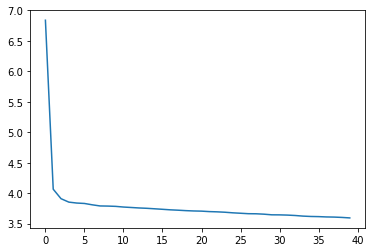

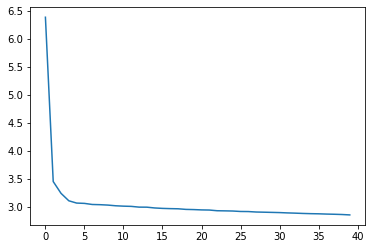

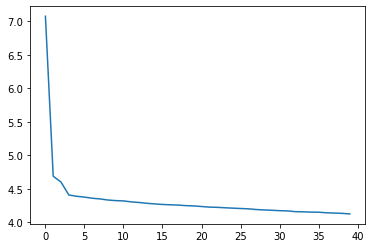



layer  6
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


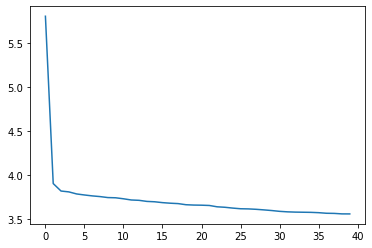

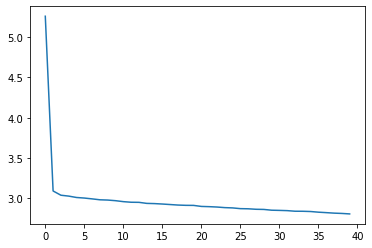

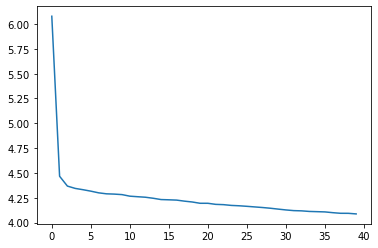



layer  7
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


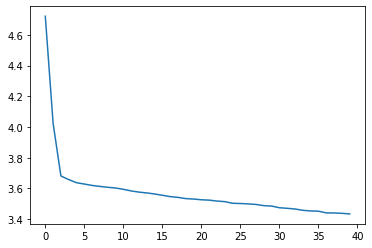

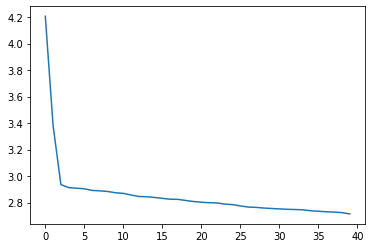

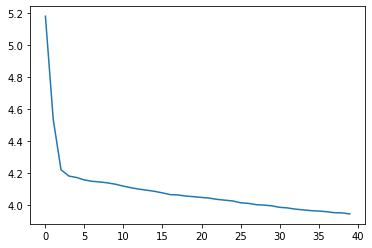



layer  8
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


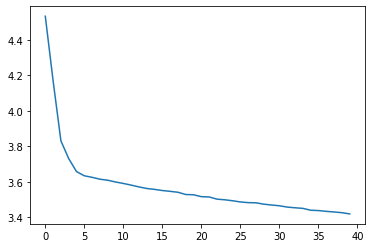

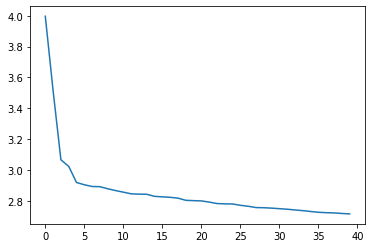

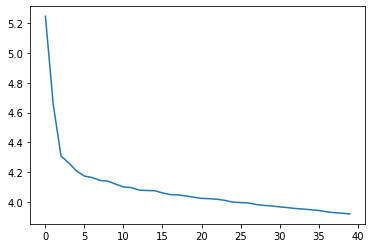



layer  9
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


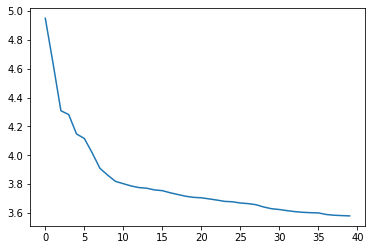

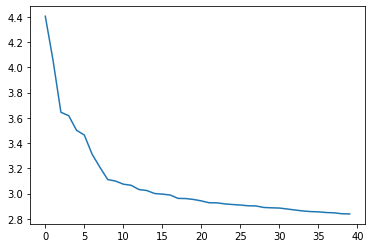

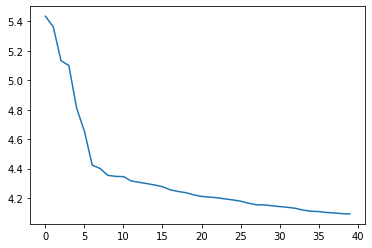



layer  10
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


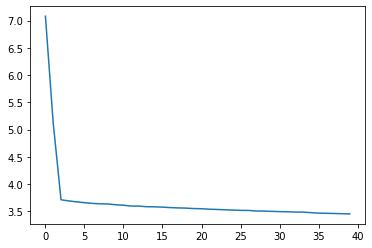

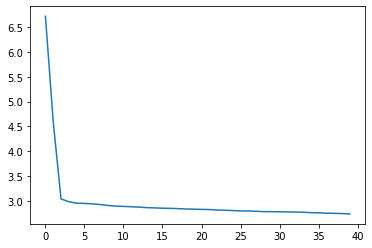

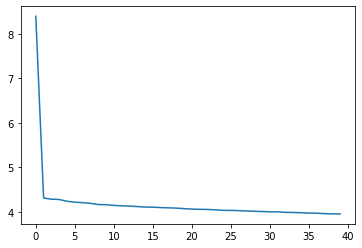



layer  11
in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


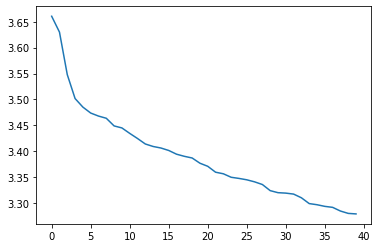

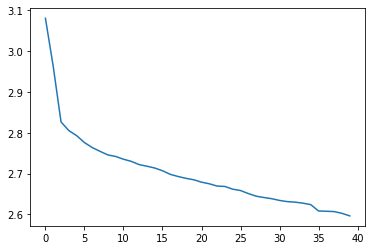

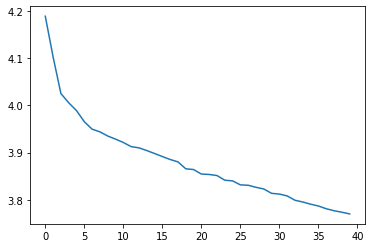

In [13]:
import matplotlib.pyplot as plt
for ind, elem in enumerate(colbert.bert.encoder.layer):
    print ("layer ", ind)
    fc_w = colbert.bert.encoder.layer[ind].output.dense
    a.set_weight(fc_w.weight)
    for elem in a.weight.s_values:
        plt.plot(elem[:40])
        plt.show()
    print ("\n")

In [18]:
fc_w = colbert.bert.encoder.layer[3].output.dense

In [7]:
a = TTLinear(in_features = 768, out_features = 3072, ranks =[72, 72, 72] , output_dims = [32, 2, 3, 16], input_dims= [12, 2, 2 ,16])

In [20]:
a.set_weight(fc_w.weight)

in ful rank tt data.shape torch.Size([384, 4, 6, 256])
self.cores shape [torch.Size([1, 384, 384]), torch.Size([384, 4, 1536]), torch.Size([1536, 6, 256]), torch.Size([256, 256, 1])]
in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


In [1]:
restored = a.weight.torch()

NameError: name 'a' is not defined

In [ ]:
restored.shape

In [ ]:
fc_w.weight.shape

In [ ]:
torch.norm(restored - fc_w.weight)/torch.norm(fc_w.weight)

In [8]:
norms = []
for rank in [1, 2, 5, 6, 8, 10, 15, 20, 30, 50, 72]:
    a = TTLinear(in_features = 768, out_features = 3072, ranks =[rank, rank, rank], output_dims = [32, 2, 3, 16], input_dims= [12, 2, 2 ,16])
    a.set_weight(fc_w.weight)
    restored = a.weight.torch()
    print ("norm")
    norm = torch.norm(restored - fc_w.weight)/torch.norm(fc_w.weight)
    print (norm)
    norms.append(norm)
    print ("\n")

in round tt cores
torch.Size([1, 384, 384])
torch.Size([384, 4, 1536])
torch.Size([1536, 6, 256])
torch.Size([256, 256, 1])


TypeError: object of type 'NoneType' has no len()